## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [3]:
raw_csv_data = pd.read_csv("Index_modified.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
'''df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')'''

"df_comp=df_comp.asfreq('b')\ndf_comp=df_comp.fillna(method='ffill')"

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [7]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [9]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34025.754
Date:                Sat, 14 Oct 2023   AIC                          68057.509
Time:                        19:09:33   BIC                          68077.706
Sample:                             0   HQIC                         68064.511
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8303      0.041     20.043      0.000       0.749       0.912
ma.L1         -0.8653      0.037    -23.441      0.000      -0.938      -0.793
sigma2      3422.7356     36.783     93.053      0.000    3350.643    3494.829
===================================================================================
Ljung-Box (L1) (Q):                   2.94   Jarque-Bera (JB):              3632.49
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.32
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of the ARIMA(1,1,1)

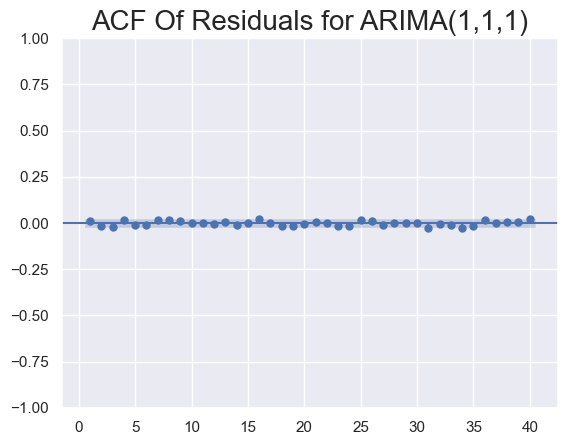

In [10]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

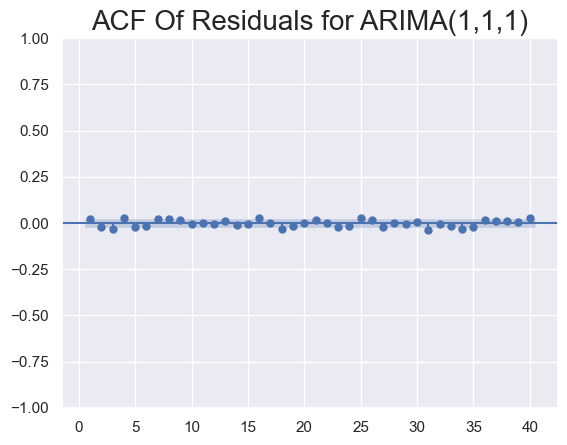

In [11]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

## Higher-Lag ARIMA Models

In [14]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [15]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -34025.754450550885 	 AIC =  68057.50890110177
ARIMA(1,1,2):  	 LL =  -34021.70907798949 	 AIC =  68051.41815597899
ARIMA(1,1,3):  	 LL =  -34019.20225381725 	 AIC =  68048.4045076345
ARIMA(2,1,1):  	 LL =  -34021.572116514246 	 AIC =  68051.14423302849
ARIMA(3,1,1):  	 LL =  -34020.74115117156 	 AIC =  68051.48230234312
ARIMA(3,1,2):  	 LL =  -34019.05754868245 	 AIC =  68050.1150973649


In [16]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.025


In [17]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.001


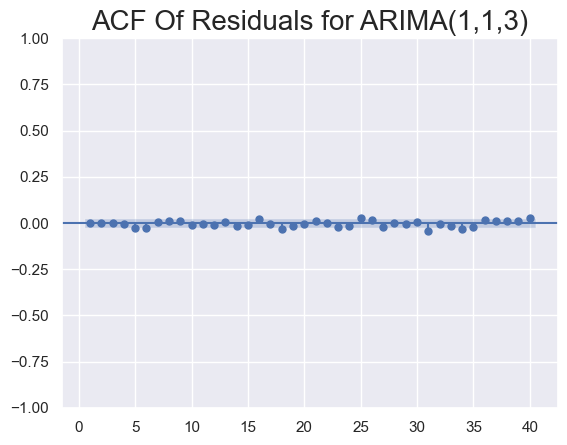

In [18]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

In [22]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()

In [23]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -34014.641
Date:                Sat, 14 Oct 2023   AIC                          68043.283
Time:                        19:11:11   BIC                          68090.409
Sample:                             0   HQIC                         68059.621
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3681      0.155      2.372      0.018       0.064       0.672
ar.L2         -0.0457      0.009     -4.866      0.000      -0.064      -0.027
ar.L3         -0.0378      0.012     -3.214      0.001      -0.061      -0.015
ar.L4          0.0282      0.012      2.268      0.023       0.004       0.053
ar.L5         -0.0464      0.008     -5.517      0.000      -0.063      -0.030
ma.L1         -0.3799      0.156     -2.443      0.015      -0.685      -0.075
sigma2      3413.9398     37.458     91.140      0.000    3340.523    3487.357
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3394.80
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.30
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -34019.20225381725 	 AIC =  68048.4045076345
ARIMA(5,1,1):  	 LL =  -34014.64142940913 	 AIC =  68043.28285881826
ARIMA(6,1,3):  	 LL =  -34012.07446474298 	 AIC =  68044.14892948596


In [25]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))


LLR test p-value = 0.014


In [26]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.162


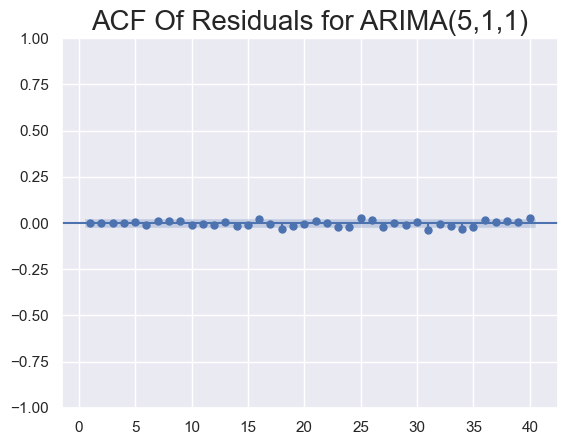

In [27]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

## Models with Higher Levels of Integration

In [28]:
df['delta_prices']=df.market_value.diff(1)

In [29]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6200
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34025.130
Date:                Sat, 14 Oct 2023   AIC                          68058.260
Time:                        19:11:13   BIC                          68085.189
Sample:                             0   HQIC                         68067.596
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6585      0.656      1.004      0.315      -0.627       1.944
ar.L1          0.8358      0.040     20.902      0.000       0.757       0.914
ma.L1         -0.8706      0.036    -24.369      0.000      -0.941      -0.801
sigma2      3421.9356     36.998     92.489      0.000    3349.420    3494.451
===================================================================================
Ljung-Box (L1) (Q):                   2.90   Jarque-Bera (JB):              3639.06
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.32
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
sts.adfuller(df.delta_prices[1:])

(-35.50891681865371,
 0.0,
 5,
 6194,
 {'1%': -3.431406185358798,
  '5%': -2.862006739523472,
  '10%': -2.5670184426062947},
 67682.34205085899)

In [32]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -34036.696
Date:                Sat, 14 Oct 2023   AIC                          68079.393
Time:                        19:11:25   BIC                          68099.589
Sample:                             0   HQIC                         68086.395
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0087      0.009     -0.984      0.325      -0.026       0.009
ma.L1         -1.0000      0.010   -101.886      0.000      -1.019      -0.981
sigma2      3436.0584     48.491     70.859      0.000    3341.018    3531.099
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3579.85
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.21
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

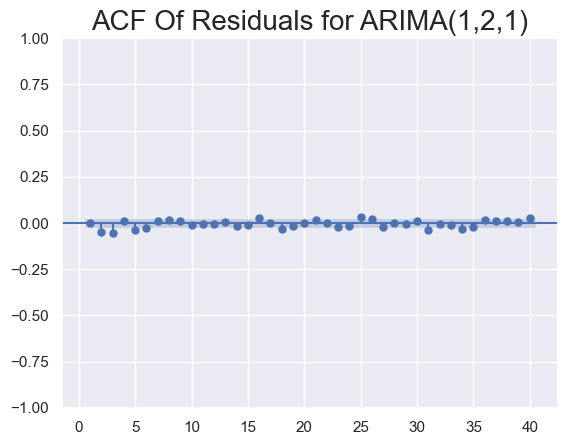

In [33]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

## ARIMAX 

In [34]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32883.543
Date:                Sat, 14 Oct 2023   AIC                          65775.086
Time:                        19:11:32   BIC                          65802.015
Sample:                             0   HQIC                         65784.422
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5907      0.031     83.331      0.000       2.530       2.652
ar.L1          0.2120      0.030      7.145      0.000       0.154       0.270
ma.L1         -0.4813      0.027    -18.051      0.000      -0.534      -0.429
sigma2      2367.7616     24.592     96.283      0.000    2319.563    2415.960
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              4632.97
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6201
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -32899.916
Date:                           Sat, 14 Oct 2023   AIC                          65813.832
Time:                                   19:11:43   BIC                          65860.959
Sample:                                        0   HQIC                         65830.171
                                          - 6201                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6057      0.031     84.408      0.000       2.545       2.666
ar.L1          0.9999      0.000   4167.211      0.000       0.999       1.000
ma.L1         -0.2863      0.009    -33.513      0.000      -0.303      -0.270
ar.S.L5        0.9680      0.004    223.350      0.000       0.959       0.976
ar.S.L10       0.0319      0.004      8.191      0.000       0.024       0.039
ma.S.L5       -0.9992      0.003   -287.614      0.000      -1.006      -0.992
sigma2      2360.3748     24.922     94.710      0.000    2311.528    2409.221
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):              4461.41
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""